In [1]:

import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

In [2]:
from ezc3d import c3d
import numpy as np

In [3]:
import dataprocesing as dp
import numpy as np
import importlib

In [4]:
path=r"Y:\nurse\2019_08_29_B0436\New Session\B0436 PrzenoszeniePrawidlowe T01.c3d"

In [5]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale
from pyomeca import Analogs
    
def normalize_data(data_path):

    muscles2 = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
    muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

 
    emg=Analogs.from_c3d(data_path, usecols=muscles)

    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
     
    emg_p['channel'] = muscles_names2
 
    return emg_p

In [6]:
processed=normalize_data(path)

In [7]:
def show_emg_data(emg_processed):
    emg_processed.plot(x="time", col="channel", col_wrap=3)
    #plt.plot(emg_processed)

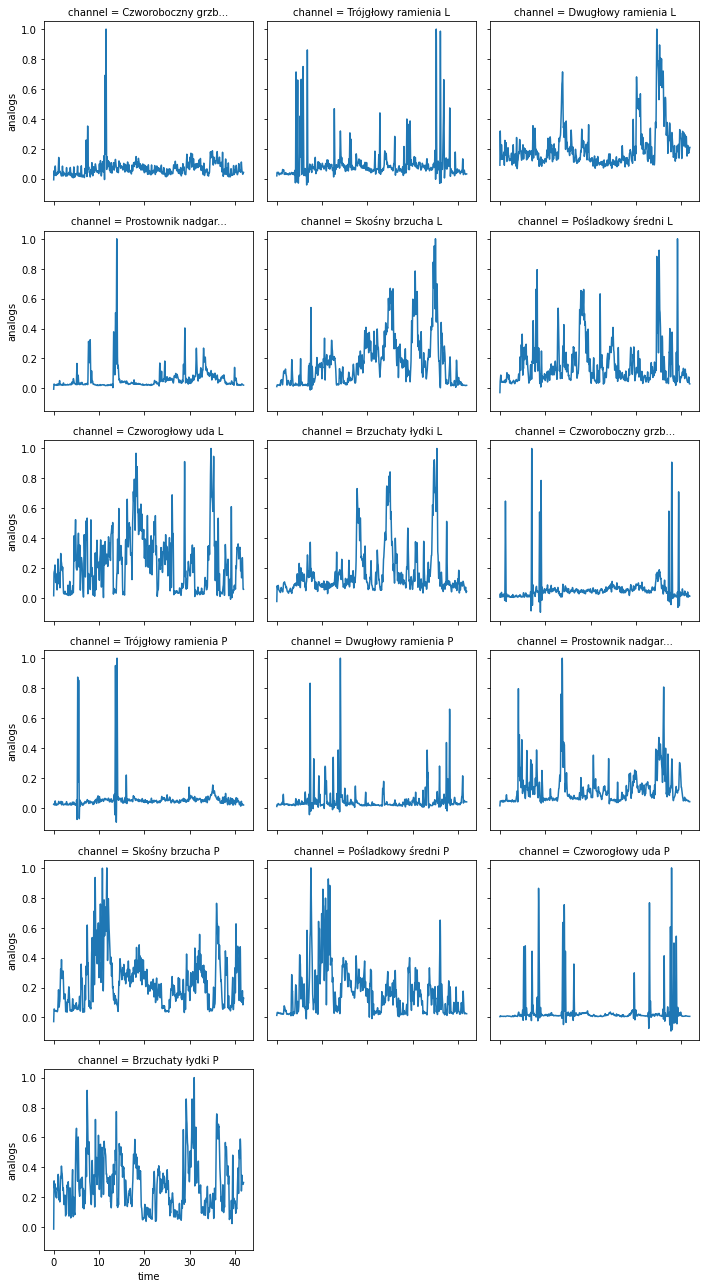

In [8]:
show_emg_data(processed)

In [9]:
def show_data(processed):
    processed.plot(x="time", col="channel", col_wrap=3)
    #print('ok')
    #plt.plot(emg_processed)
    
def load_and_show_data(data_path):
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
    processed=Analogs.from_c3d(data_path, usecols=muscles)
    processed.plot(x="time", col="channel", col_wrap=3)

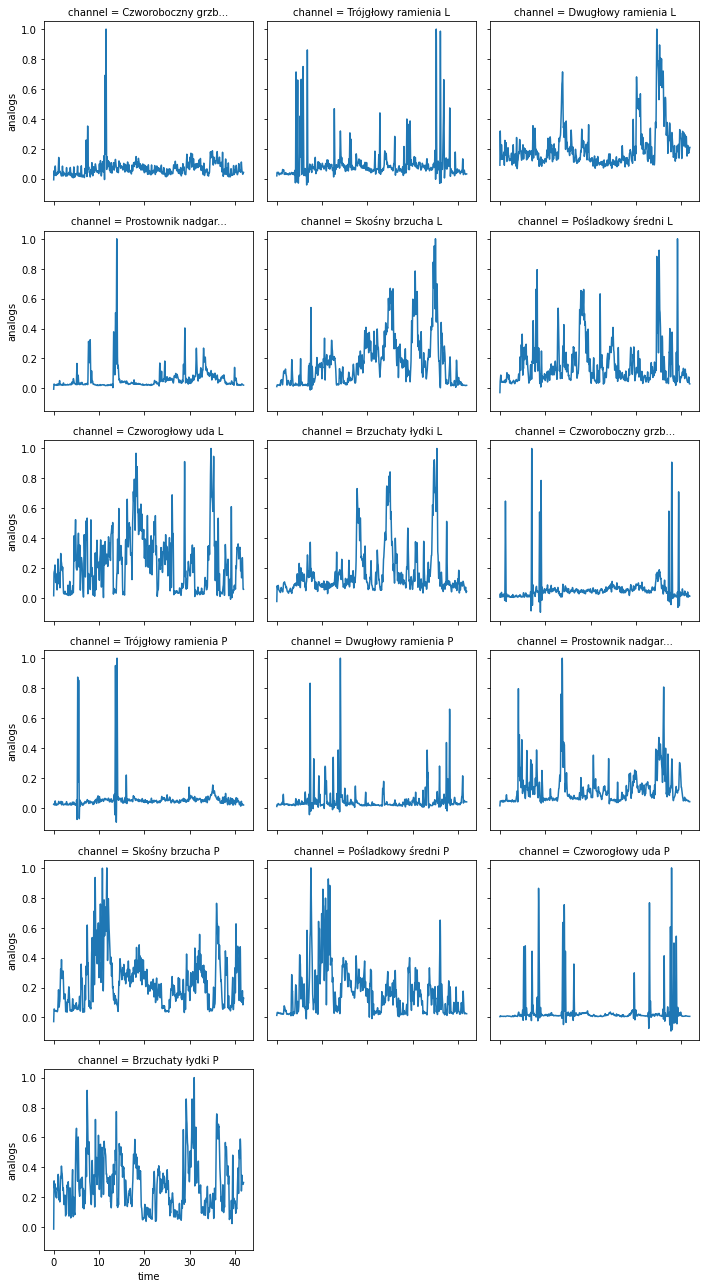

In [10]:
show_data(processed)

In [11]:
def show_avr2(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    aver_arr=np.zeros((16,1000)) 
  
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=0.3, 
                    wspace=0.25, 
                    hspace=0.35)
         
        emg_processed_event=emg_processed[num]
        emg_processed_event2 = (
        emg_processed_event.meca.normalize(ref=None, scale=1)            
        )
        time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
        
        
        c3d_to_compare= c3d(path)
        eventTime = c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1] 
        nFrames = c3d_to_compare['parameters']['POINT']['FRAMES']['value'][0]
        nn = nFrames/1000
        markevent = eventTime/nn*100
       
        for t in range(1000):
                aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]
       
        aver_arr[num]=aver_arr[num]/10
        time=np.linspace(1,1000,1000)
        plt.plot(time,aver_arr[num]) 
        for axl in range(12):
            plt.axvline(markevent[axl], color='r')
        plt.title(muscles_names2[num])
        plt.fill_between(time,aver_arr[num])
        plt.show()
    
    return aver_arr

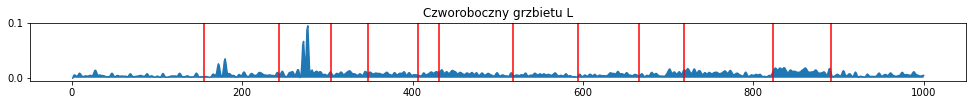

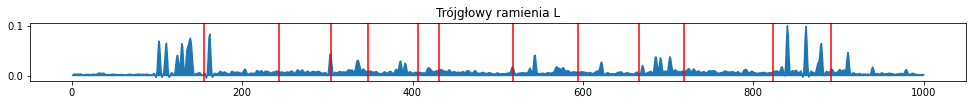

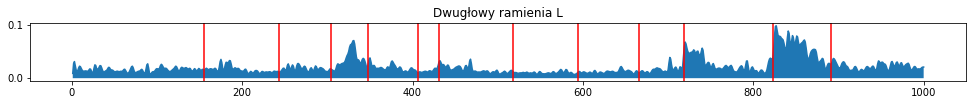

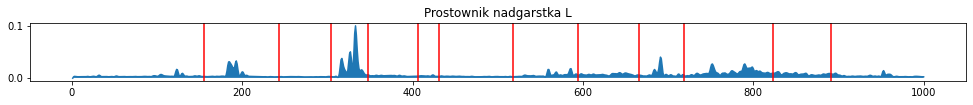

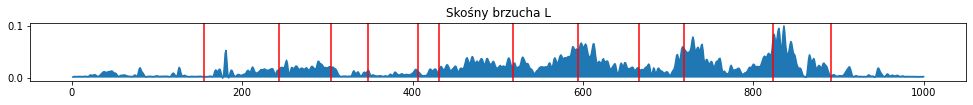

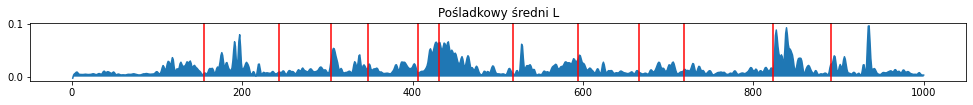

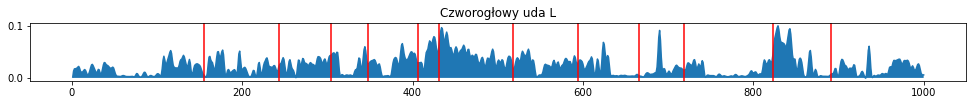

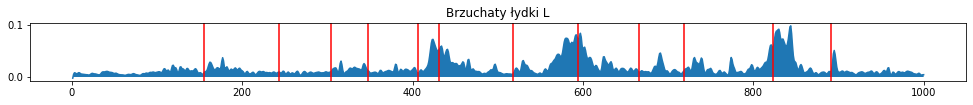

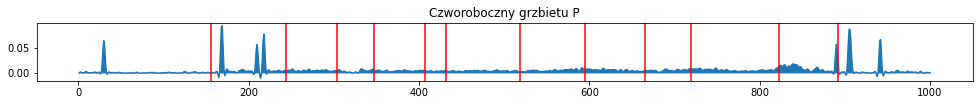

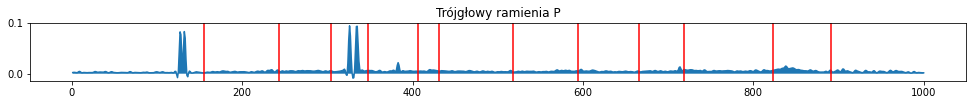

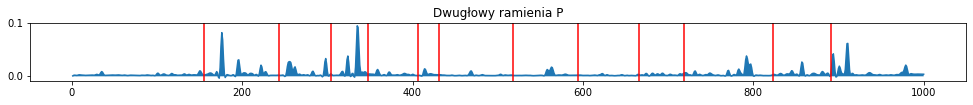

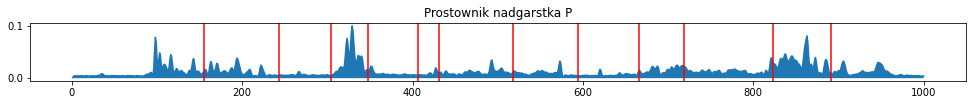

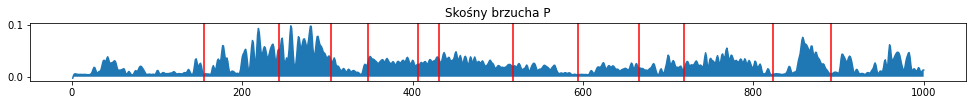

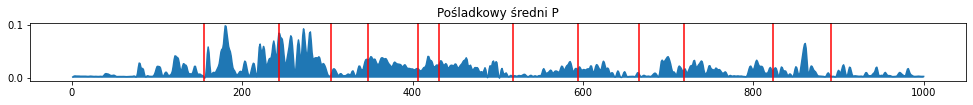

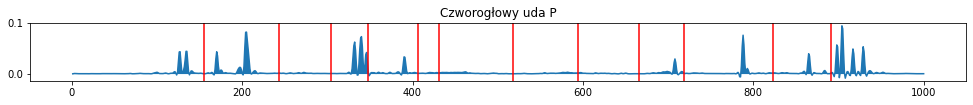

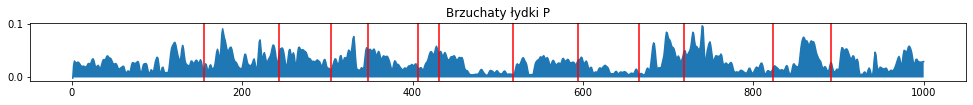

array([[-0.00075563,  0.0036415 ,  0.00528963, ...,  0.00385564,
         0.00418297,  0.00423062],
       [ 0.00187541,  0.00348773,  0.00423514, ...,  0.00311936,
         0.00317501,  0.00318482],
       [ 0.00899973,  0.02744352,  0.03128395, ...,  0.02018881,
         0.02087624,  0.02094048],
       ...,
       [ 0.00138948,  0.00251389,  0.00323252, ...,  0.0024821 ,
         0.00248599,  0.00248647],
       [ 0.00051332,  0.00086053,  0.00112232, ...,  0.00072617,
         0.00073733,  0.00073905],
       [-0.00129435,  0.0228197 ,  0.03092982, ...,  0.02890756,
         0.02968284,  0.02985564]])

In [12]:
show_avr2(path,emg_processed=None)

In [13]:

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]
    nFrames = c3d_to_compare['parameters']['POINT']['FRAMES']['value'][0]
    eventTime = c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1] 
    nn = nFrames/1000
    markevent = eventTime/nn*100
    
    return [event, time, nFrames]

In [14]:
read_labels(path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event'],
 array([ 6.51000023, 10.18999958, 14.53999996, 12.73999977, 17.02000046,
        18.05999947, 21.70000076, 24.89999962, 27.86000061, 30.10000038,
        34.45000076, 37.33000183]),
 4187]

In [101]:
def showPart(data_path,emg_processed=None,part=False):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    aver_arr=np.zeros((16,1000)) 
    
    c3d_to_compare= c3d(path)
    eventTime = c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1] 
    nFrames = c3d_to_compare['parameters']['POINT']['FRAMES']['value'][0]
    nn = nFrames/1000
    markevent = eventTime/nn*100
    
    
   
    p0 = round(markevent[int(part)-1])
    p1 = round(markevent[int(part)])
    
    print(p0)
    print(p1)
    print(part)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=0.3, 
                    wspace=0.25, 
                    hspace=0.35)
         
        emg_processed_event=emg_processed[num]
        emg_processed_event2 = (
        emg_processed_event.meca.normalize(ref=None, scale=1)            
        )
        time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
   
    

        
        for t in range(1000):
                aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]
       
        aver_arr[num]=aver_arr[num]/10
        time=np.linspace(1,1000,1000)
        plt.plot(aver_arr[num][int(p0):int(p1)]) 
       
        plt.title(muscles_names2[num])
        plt.show()
    
    return aver_arr

# part zasięg (0:11)

823.0
892.0
11


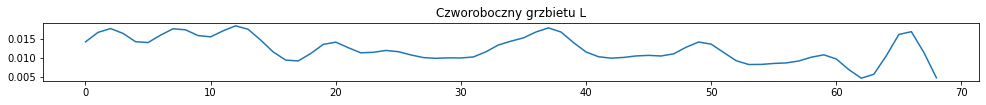

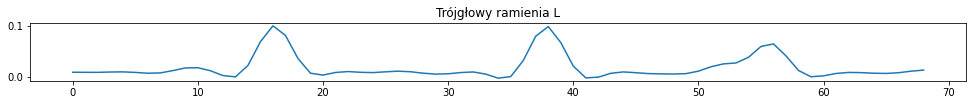

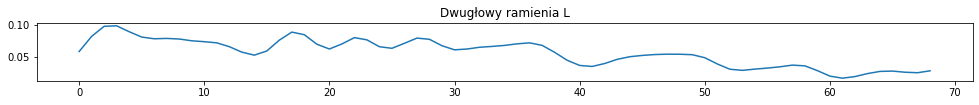

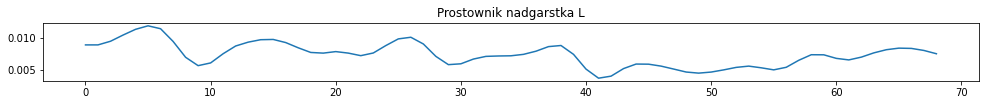

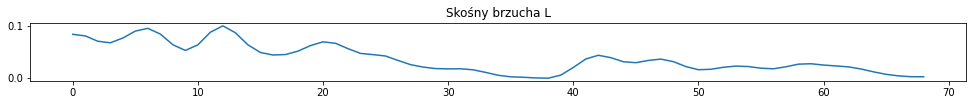

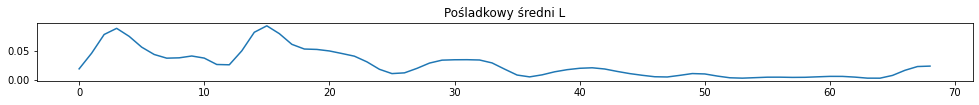

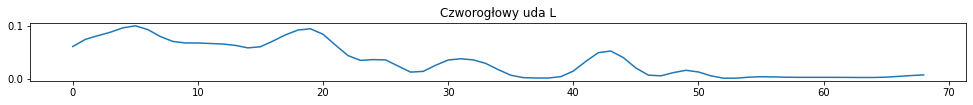

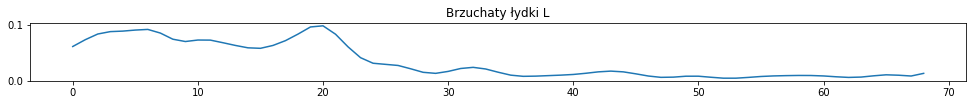

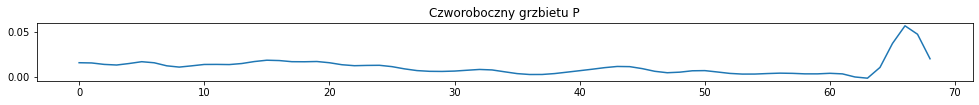

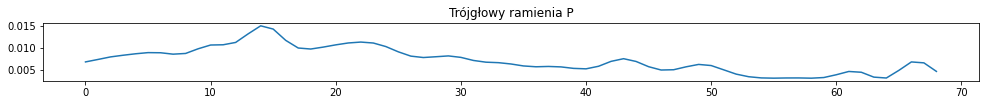

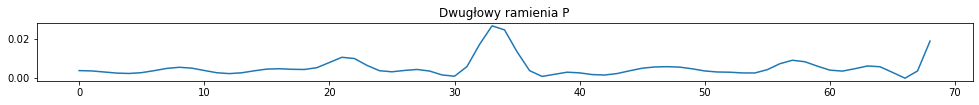

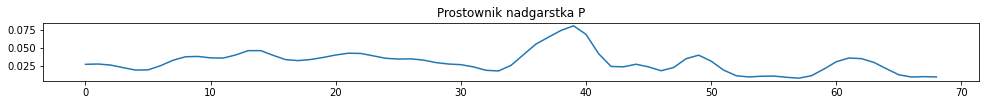

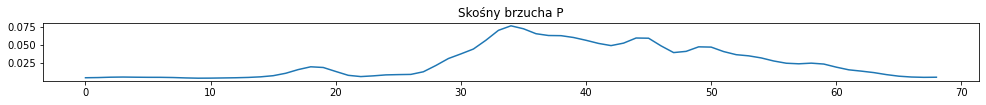

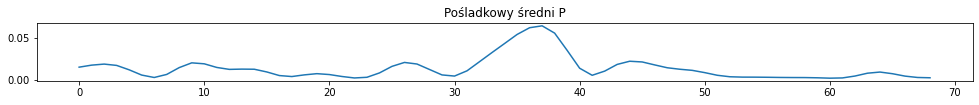

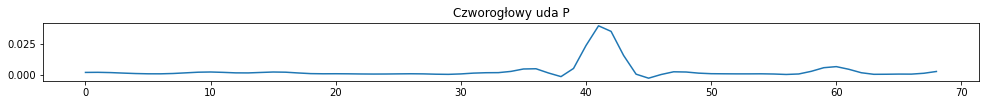

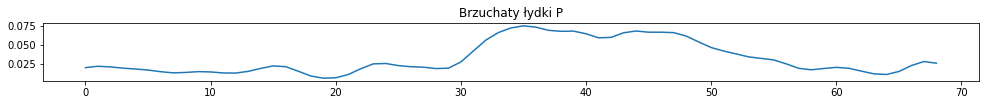

array([[-0.00075563,  0.0036415 ,  0.00528963, ...,  0.00385564,
         0.00418297,  0.00423062],
       [ 0.00187541,  0.00348773,  0.00423514, ...,  0.00311936,
         0.00317501,  0.00318482],
       [ 0.00899973,  0.02744352,  0.03128395, ...,  0.02018881,
         0.02087624,  0.02094048],
       ...,
       [ 0.00138948,  0.00251389,  0.00323252, ...,  0.0024821 ,
         0.00248599,  0.00248647],
       [ 0.00051332,  0.00086053,  0.00112232, ...,  0.00072617,
         0.00073733,  0.00073905],
       [-0.00129435,  0.0228197 ,  0.03092982, ...,  0.02890756,
         0.02968284,  0.02985564]])

In [103]:
showPart(path,emg_processed=None,part=11)